## 데이터 검증


### 1. 데이터 검증 개념

- 검증은 데이터 입력 규칙에 일치하지 않는 데이터도출한다.
- 제외할 것인지, 평균값으로 대체할 것인지 이후 대응책을 결정한다.
- 너무 많이 제거하면 결과에 영향을 줄 수 있음

#### 이상값 - 지나치게 높거나 낮은 값
#### 결측값 - 비어있음

### 2. 결측치 처리방법

- NA 레코드 제거  
- NA가 아닌 값으로만 연산하기
- 대체 : 회귀분석을 했을 때의 추정값으로 대체, 최빈값 혹은 평균값으로 대체
- NA를 0으로 대체하기

#### 방법
- 1 제거 - 함수 na.omit을 사용
- 2 평균치 삽입법 - 누락된 사례의 변수값으로 변수의 평균치를 계산하여 사용한다.
- 3 보삽법 - 시계열자료의 누락에서 사용하는 방법, 지난 기간의 자료들로 에측
- 4 평가치추정법 - 평균치를 사용하는게 아니라, 작은 오차를 감수하면서 원래의 값을 추정


### 3. 이상치 판정 방법
 - 제거, 상한/하한값(정규분포 기준)으로 대체할 수 있다. 
 - 데이터의 특성에 따라 적용 방법이 따르다.
 - 정규분포의 여부 /  그룹화 여부

#### 1. 모수적방법 - 정규 분포를 따른다면 사용
- 정규모형기반 - 3sigma, rulebox plot
- 회귀모형기반 - 데이터를 회귀모형에 적합한 후 잔차(산점도에서 ax+b로 설명이 안되는 데이터) 분석, 잔차가 크면 이상치로 판단
- 혼합 모수적 분포 기반 : 정상자료는 표준정규분포 - N(0,1) 비정상자료는 분산이 큰 정규분포 - N(평균,큰 분산)를 생성.

#### 2. 비모수적 방법
- 정규분포 인지 모르거나 아닐때, 히스토그램, 커널함수 기반을 이용해서 이상치를 찾는 방법

- 커널함수 기반(데이터를 잘 설명하는 수식을 찾음)
- 데이터 전체에 대한 f(x1)을 계산하고, 데이터 상위값과 하위값을 제거한 후 f(x10)를 계산
- f(x1)과 f(x2)가 값이 많이 차이나는 지점이 있으면 해당 데이터가 이상치다.

#### 3. 군집기반
- 군집에서 멀리 떨어진 데이터를 이상치로 본다. 
- SOM, K-means, EM

#### 4. k근접이웃기반
- 각 자료로부터 k번째 이웃까지 거리(유클리디안 거리) 를 비정상 점수로 이용하는 방법
- 산점도에서 점의 그룹간의 상대적 density를 비정상점수로 계산, 밀도가 낮은 그룹은 비정상(이상치) 판단
- 비정상 점수 == 밀도


### NA처리 함수

- na.omit() - NA가 포함된 값을 완전히 제외함
- na.fail() - NA가 하나라도 포함되면 계산 중지
- na.excluded() - NA는 분석에서 제외하고 싶으나, 검증 결과값의 순서가 중요할 때는 유용)



### 5. table[ ]함수로 결측치 확인

- table()은 기본 설정으로는 결측치 개수를 셀수 없으므로, exclude = NULL 옵션을 설정해 주어야 결측의 개수 카운트 할 수 있다

In [4]:
a <- rep(c(NA, 1/0:3),10)
a

[1]        NA       Inf 1.0000000 0.5000000 0.3333333        NA       Inf
 [8] 1.0000000 0.5000000 0.3333333        NA       Inf 1.0000000 0.5000000
[15] 0.3333333        NA       Inf 1.0000000 0.5000000 0.3333333        NA
[22]       Inf 1.0000000 0.5000000 0.3333333        NA       Inf 1.0000000
[29] 0.5000000 0.3333333        NA       Inf 1.0000000 0.5000000 0.3333333
[36]        NA       Inf 1.0000000 0.5000000 0.3333333        NA       Inf
[43] 1.0000000 0.5000000 0.3333333        NA       Inf 1.0000000 0.5000000
[50] 0.3333333

In [5]:
table(a)

a
0.333333333333333               0.5                 1               Inf 
               10                10                10                10 

In [6]:
table(a, exclude = NULL)

a
0.333333333333333               0.5                 1               Inf 
               10                10                10                10 
             <NA> 
               10 

### 6. 잘못 입력된 값 찾기(이상치)

- 순서 : 파일불러오기(read.csv) -> 데이터 파악( str(), data.calss(), typeof())  -> 이상치 찾기

##### 파일 불러오기

In [19]:
valida <- read.csv("dataValidation.csv", header = TRUE, encoding = "UTF-8")
valida

gender,group,score
1,1,3.04
2,1,3.19
1,1,3.09
1,1,3.54
2,1,2.48
1,1,3.29
1,1,2.65
1,1,2.98
1,1,2.44
1,1,3.03


##### 자료 정보 파악하기

In [17]:

str(valida)

data.class(valida) #data.frame
typeof(valida$gender) #integer
typeof(valida$group)  #integer
typeof(valida$score)  #double


'data.frame':	150 obs. of  3 variables:
 $ gender: int  1 2 1 1 2 1 1 1 1 1 ...
 $ group : int  1 1 1 1 1 1 1 1 1 1 ...
 $ score : num  3.04 3.19 3.09 3.54 2.48 3.29 2.65 2.98 2.44 3.03 ...


[1] "data.frame"

[1] "integer"

[1] "integer"

[1] "double"

##### 이상치 찾기

In [21]:
#gender 속성에는 "1"과 "2"만 있고, 나머지는 이상값
valida[valida[,1]>2 | valida[,1]<0,]   #30 case, gender=5

#group 속성에는 "1,2,3"의 값만 있고,
valida[valida[,2]>3 | valida[,2]<0,]   #54 case, group=7

#score 속성에서 "0 ~ 5"의 값만 있고,
valida[valida[,3]>5 | valida[,3]<0,]   #27, 58 case / score 7 10

,gender,group,score
30,5,3,2.97


,gender,group,score
54,1,7,2.53


,gender,group,score
27,1,1,7
78,1,2,10


### 7. 특정값 결측으로 설정하기

In [22]:
icheon_regression <- read.csv("reproduct_temp_rain_UTF8.csv")
summary(icheon_regression)

      X.2            발생년월일2         X.1          발생년월일      
 Min.   :    1   2012-09-14:   28   Min.   :    1   Min.   :20100101  
 1st Qu.: 3594   2014-04-29:   28   1st Qu.: 3594   1st Qu.:20110605  
 Median : 7186   2015-10-03:   28   Median : 7186   Median :20121111  
 Mean   : 7186   2011-09-24:   27   Mean   : 7186   Mean   :20124947  
 3rd Qu.:10779   2010-01-01:   26   3rd Qu.:10779   3rd Qu.:20140610  
 Max.   :14372   2011-01-12:   26   Max.   :14372   Max.   :20151231  
                 (Other)   :14209                                     
     발생시           X               Y              발생        사망        
 18시   :1062   Min.   :126.9   Min.   :37.04   Min.   :1   Min.   :0.00000  
 21시   : 877   1st Qu.:127.4   1st Qu.:37.24   1st Qu.:1   1st Qu.:0.00000  
 20시   : 860   Median :127.5   Median :37.27   Median :1   Median :0.00000  
 19시   : 849   Mean   :127.5   Mean   :37.25   Mean   :1   Mean   :0.01406  
 22시   : 820   3rd Qu.:127.5   3rd Qu.:37.28   3rd Qu.:1   3rd 

##### 결측값 찾기

In [23]:
apply(apply(icheon_regression,2,is.na),2,sum)  #평균기온의 19개의 결측값 나옴.

X.2     발생년월일2             X.1      발생년월일          발생시 
              0               0               0               0               0 
              X               Y            발생            사망            중상 
              0               0               0               0               0 
           경상        부상신고        사고유형      사고유형.1      사고유형.2 
              0               0               0               0               0 
   인적유발요인    인적유발요일  차량적유발요인        법규위반      법규위반.1 
              0               0               0               0               0 
     법규위반.2   법규위반.8종.        행동유형      행동유형.1      당사자종별 
              0               0               0               0               0 
   당사자종별.1      차량용도별    차량용도별.1    차량용도별.2        도로형태 
              0               0               0               0               0 
     도로형태.1        기상상태      사상자성별      사상자연령            개요 
              0               0               0               0               0 
           year             mon             day   발생년월일2_2        weekdays 
              0               0               0               0               0 
       주중토일      발생시_num 발생시_interval      강수량.mm.        평균기온 
              0               0               0            9175              19 
       최저기온        최고기온 
              8               8

In [24]:
icheon_regression[c(1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225),'평균기온'] <- 20.6


In [25]:
icheon_regression[c(8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248),'평균기온']<- 12.4 


In [26]:
# 평균기온의 결측값 사라짐
apply(apply(icheon_regression,2,is.na),2,sum)

X.2     발생년월일2             X.1      발생년월일          발생시 
              0               0               0               0               0 
              X               Y            발생            사망            중상 
              0               0               0               0               0 
           경상        부상신고        사고유형      사고유형.1      사고유형.2 
              0               0               0               0               0 
   인적유발요인    인적유발요일  차량적유발요인        법규위반      법규위반.1 
              0               0               0               0               0 
     법규위반.2   법규위반.8종.        행동유형      행동유형.1      당사자종별 
              0               0               0               0               0 
   당사자종별.1      차량용도별    차량용도별.1    차량용도별.2        도로형태 
              0               0               0               0               0 
     도로형태.1        기상상태      사상자성별      사상자연령            개요 
              0               0               0               0               0 
           year             mon             day   발생년월일2_2        weekdays 
              0               0               0               0               0 
       주중토일      발생시_num 발생시_interval      강수량.mm.        평균기온 
              0               0               0            9175               0 
       최저기온        최고기온 
              8               8

### 9.결측이 존재하는 행 모두 출력

#### 데이터 읽기

In [27]:
diris <- iris

##### 데이터 결측값 생성하기

In [28]:
diris[c(10, 20,25, 30, 32, 40, 50),3] <- NA
diris[c(33, 66, 100, 123, 133),1] <- NA

##### 결측이 존재하는 행 찾기

In [29]:
diris[!complete.cases(diris),]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
10,4.9,3.1,NA,0.1,setosa
20,5.1,3.8,NA,0.3,setosa
25,4.8,3.4,NA,0.2,setosa
30,4.7,3.2,NA,0.2,setosa
32,5.4,3.4,NA,0.4,setosa
33,NA,4.1,1.5,0.1,setosa
40,5.1,3.4,NA,0.2,setosa
50,5.0,3.3,NA,0.2,setosa
66,NA,3.1,4.4,1.4,versicolor
100,NA,2.8,4.1,1.3,versicolor


### 10. 데이터를 리모델링 하면서 결측의 위치 확인

In [34]:
library(reshape2)

##### 데이터읽기

In [65]:
ChickWeight_TM <- ChickWeight

# tolower - 열이름의 대문자를 소문자로 바꾸기
names(ChickWeight_TM) <- tolower(names(ChickWeight_TM))

##### 특정값 찾기 (chick열이 18인 값)

In [63]:
ChickWeight_TM[ChickWeight_TM$chick==18,]

,weight,time,chick,diet
195,39,0,18,1
196,35,2,18,1


In [64]:
acast(ChickWeight_TM, chick ~ time)

Using diet as value column: use value.var to override.


0 2 4    6    8    10   12   14   16   18   20   21  
18 1 1 <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA> <NA>
16 1 1 1    1    1    1    1    <NA> <NA> <NA> <NA> <NA>
15 1 1 1    1    1    1    1    1    <NA> <NA> <NA> <NA>
13 1 1 1    1    1    1    1    1    1    1    1    1   
9  1 1 1    1    1    1    1    1    1    1    1    1   
20 1 1 1    1    1    1    1    1    1    1    1    1   
10 1 1 1    1    1    1    1    1    1    1    1    1   
8  1 1 1    1    1    1    1    1    1    1    1    <NA>
17 1 1 1    1    1    1    1    1    1    1    1    1   
19 1 1 1    1    1    1    1    1    1    1    1    1   
4  1 1 1    1    1    1    1    1    1    1    1    1   
6  1 1 1    1    1    1    1    1    1    1    1    1   
11 1 1 1    1    1    1    1    1    1    1    1    1   
3  1 1 1    1    1    1    1    1    1    1    1    1   
1  1 1 1    1    1    1    1    1    1    1    1    1   
12 1 1 1    1    1    1    1    1    1    1    1    1   
2  1 1 1    1    1    1    1    1    1    1    1    1   
5  1 1 1    1    1    1    1    1    1    1    1    1   
14 1 1 1    1    1    1    1    1    1    1    1    1   
7  1 1 1    1    1    1    1    1    1    1    1    1   
24 2 2 2    2    2    2    2    2    2    2    2    2   
30 2 2 2    2    2    2    2    2    2    2    2    2   
22 2 2 2    2    2    2    2    2    2    2    2    2   
23 2 2 2    2    2    2    2    2    2    2    2    2   
27 2 2 2    2    2    2    2    2    2    2    2    2   
28 2 2 2    2    2    2    2    2    2    2    2    2   
26 2 2 2    2    2    2    2    2    2    2    2    2   
25 2 2 2    2    2    2    2    2    2    2    2    2   
29 2 2 2    2    2    2    2    2    2    2    2    2   
21 2 2 2    2    2    2    2    2    2    2    2    2   
33 3 3 3    3    3    3    3    3    3    3    3    3   
37 3 3 3    3    3    3    3    3    3    3    3    3   
36 3 3 3    3    3    3    3    3    3    3    3    3   
31 3 3 3    3    3    3    3    3    3    3    3    3   
39 3 3 3    3    3    3    3    3    3    3    3    3   
38 3 3 3    3    3    3    3    3    3    3    3    3   
32 3 3 3    3    3    3    3    3    3    3    3    3   
40 3 3 3    3    3    3    3    3    3    3    3    3   
34 3 3 3    3    3    3    3    3    3    3    3    3   
35 3 3 3    3    3    3    3    3    3    3    3    3   
44 4 4 4    4    4    4    4    4    4    4    <NA> <NA>
45 4 4 4    4    4    4    4    4    4    4    4    4   
43 4 4 4    4    4    4    4    4    4    4    4    4   
41 4 4 4    4    4    4    4    4    4    4    4    4   
47 4 4 4    4    4    4    4    4    4    4    4    4   
49 4 4 4    4    4    4    4    4    4    4    4    4   
46 4 4 4    4    4    4    4    4    4    4    4    4   
50 4 4 4    4    4    4    4    4    4    4    4    4   
42 4 4 4    4    4    4    4    4    4    4    4    4   
48 4 4 4    4    4    4    4    4    4    4    4    4   
Levels: 1 2 3 4

### 11. 결측치가 있는 행 삭제

결측치가 있는 행의 제거는 na.omit()을 사용한다.

##### na.omit()

In [68]:
dSample <- data.frame(x=c(1,2,3), y=c(0,10,NA))
dSample

x,y
1,0
2,10
3,NA


In [69]:
na.omit(dSample)

x,y
1,0
2,10


### 12. 결측치와 이상값이 있는 행 삭제

결측값 NA, 이상값 -8, -9 레코드를 모두 삭제

In [71]:
vX1 <- c(1,2,3,NA,5,-9,-8,1,2,3)
vX2 <- c(1,2,3,4,NA,NA,-9,1,2,-8)
dX <- data.frame(vX1, vX2)
dX

vX1,vX2
1,1
2,2
3,3
NA,4
5,NA
-9,NA
-8,-9
1,1
2,2
3,-8


In [74]:
dX <- dX[!dX$vX1 <0,]
dX

,vX1,vX2
1,1,1
2,2,2
3,3,3
NA,NA,NA
5,5,NA
8,1,1
9,2,2
10,3,-8


In [75]:
dX <- dX[!dX$vX2 <0,]
dX

,vX1,vX2
1,1,1
2,2,2
3,3,3
NA,NA,NA
NA.1,NA,NA
8,1,1
9,2,2


### 13. 두 속성 중에 하나라도 결측 값을 가진 행 모두 삭제

In [76]:
vX1 <- c(1,2,3,NA,5,-9,-8,1,2,3)
vX2 <- c(1,2,3,4,NA,NA,-9,1,2,-8)
dX <- data.frame(vX1, vX2)
dX

vX1,vX2
1,1
2,2
3,3
NA,4
5,NA
-9,NA
-8,-9
1,1
2,2
3,-8


In [80]:
nadX[!is.na(dX$vX1) & !is.na(dX$vX2),]  #결측값이 사라짐.

,vX1,vX2
1,1,1
2,2,2
3,3,3
7,-8,-9
8,1,1
9,2,2
10,3,-8


### 14. Vecter Object에서 결측을 중앙값으로 치환

In [81]:
replacement <- data.frame(val = c(1,2,3,4,NA,5,NA))
replacement

val
1
2
3
4
NA
5
NA


In [92]:
replacement <- within(replacement,{val <- ifelse(is.na(val), median(val, na.rm = TRUE), val)})
replacement

val
1
2
3
4
3
5
3


In [93]:
replacement$val[is.na(replacement$val)] <- median(replacement$val, na.rm=TRUE)
replacement

val
1
2
3
4
3
5
3


### 15. DataFrame Object에서 결측을 중앙값으로 치환

##### data 읽어오기

In [95]:
iris_repl <- iris

In [96]:
iris_repl[1,1] = NA 

In [97]:
head(iris_repl)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
NA,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [98]:
#해당 종의 Sepal.Length의 중앙값으로 대체한다. 
replacement_df <- sapply(split(iris_repl$Sepal.Length,iris_repl$Species), median, na.rm = TRUE)

In [99]:
replacement_df

setosa versicolor  virginica 
       5.0        5.9        6.5

In [108]:
iris_repl <- within(iris_repl,{ Sepal.Length <- ifelse (is.na(Sepal.Length), replacement_df[Species], Sepal.Length)})


In [105]:
#데이터 셋 1[데이터셋2$속성명]
replacement_df[iris_repl$Species]

setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa versicolor versicolor versicolor versicolor versicolor versicolor 
       5.0        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor  virginica  virginica  virginica  virginica  virginica 
       5.9        5.9        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica 
       6.5        6.5        6.5

### 16. KNN을 사용해 K개 근접 이웃의 가중평균으로 치환

NA을 knn을 사용해 k개 근접 이웃의 가중 평균을 치환해보자.

In [109]:
iris_na <- iris

In [110]:
iris_na[c(10, 20, 25, 40, 32), 3] <- NA

In [112]:
iris_na[c(33, 100, 123), 1] <- NA

In [113]:
install.packages("DMwR")

also installing the dependencies ‘gtools’, ‘gdata’, ‘TTR’, ‘gplots’, ‘xts’, ‘quantmod’, ‘abind’, ‘ROCR’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [114]:
library(DMwR)

Loading required package: lattice
Loading required package: grid


##### 결측값 확인

In [116]:
iris_na[!complete.cases(iris_na),]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
10,4.9,3.1,NA,0.1,setosa
20,5.1,3.8,NA,0.3,setosa
25,4.8,3.4,NA,0.2,setosa
32,5.4,3.4,NA,0.4,setosa
33,NA,4.1,1.5,0.1,setosa
40,5.1,3.4,NA,0.2,setosa
100,NA,2.8,4.1,1.3,versicolor
123,NA,2.8,6.7,2.0,virginica


##### knn에 의해서 결측값을 치환한다

In [119]:
knnImputation(iris_na[1:4]) [c(10,20,25,32,33,40,100,123),]
# 영역 : 열 1~4, 보기원하는 case - [c(10,20,25,32,33,40,100,123),] 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
10,4.900000,3.1,1.452250,0.1
20,5.100000,3.8,1.539881,0.3
25,4.800000,3.4,1.457144,0.2
32,5.400000,3.4,1.483821,0.4
33,5.462532,4.1,1.500000,0.1
40,5.100000,3.4,1.475718,0.2
100,5.891169,2.8,4.100000,1.3
123,7.077197,2.8,6.700000,2.0


### 17. 성별 구분 코드값 이외값은 모두 na로 변경하기

In [122]:
#gender 속성에 9와 NA값이 포함되어 있음
dD <- data.frame(id=c("a","b","d","e","f","g"), gender=c(1,2,2,1,9,NA))
dD

id,gender
a,1
b,2
d,2
e,1
f,9
g,NA


In [125]:
#1이나 2값이 아닌 경우에는 NA로 입력하게 설정

dD$gender[dD$gender<1 | dD$gender>2] <- NA   # 데이터셋$열이름[조건] <- 조건만족하면 취할 액션
dD

id,gender
a,1
b,2
d,2
e,1
f,NA
g,NA


### 18. Missdata 처리

In [126]:
install.packages("Amelia")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [127]:
library(Amelia)

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [136]:
?Amelia  #EM algorithm을 사용하여 부트스트랩(bootstrap)을 한다. 

data 로딩 및 탐색

In [128]:
data(freetrade)

In [133]:
str(freetrade)
data.class(freetrade)

'data.frame':	171 obs. of  10 variables:
 $ year    : int  1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 ...
 $ country : chr  "SriLanka" "SriLanka" "SriLanka" "SriLanka" ...
 $ tariff  : num  NA NA 41.3 NA 31 ...
 $ polity  : int  6 5 5 5 5 5 5 5 5 5 ...
 $ pop     : num  14988000 15189000 15417000 15599000 15837000 ...
 $ gdp.pc  : num  461 474 489 508 526 ...
 $ intresmi: num  1.94 1.96 1.66 2.8 2.26 ...
 $ signed  : int  0 0 1 0 0 0 0 1 0 0 ...
 $ fiveop  : num  12.4 12.5 12.3 12.3 12.3 ...
 $ usheg   : num  0.259 0.256 0.266 0.299 0.295 ...


[1] "data.frame"

In [137]:
summary(freetrade)   #"tariff", "polity", intresmi", "signed", "fiveop"에서 NA발견

      year        country              tariff           polity      
 Min.   :1981   Length:171         Min.   :  7.10   Min.   :-8.000  
 1st Qu.:1985   Class :character   1st Qu.: 16.30   1st Qu.:-2.000  
 Median :1990   Mode  :character   Median : 25.20   Median : 5.000  
 Mean   :1990                      Mean   : 31.65   Mean   : 2.905  
 3rd Qu.:1995                      3rd Qu.: 40.80   3rd Qu.: 8.000  
 Max.   :1999                      Max.   :100.00   Max.   : 9.000  
                                   NA's   :58       NA's   :2       
      pop                gdp.pc           intresmi          signed      
 Min.   : 14105080   Min.   :  149.5   Min.   :0.9036   Min.   :0.0000  
 1st Qu.: 19676715   1st Qu.:  420.1   1st Qu.:2.2231   1st Qu.:0.0000  
 Median : 52799040   Median :  814.3   Median :3.1815   Median :0.0000  
 Mean   :149904501   Mean   : 1867.3   Mean   :3.3752   Mean   :0.1548  
 3rd Qu.:120888400   3rd Qu.: 2462.9   3rd Qu.:4.4063   3rd Qu.:0.0000  
 Max.   :9

##### amelia를 이용해서  imputation(결측값 제거) 만들기

In [138]:
a.out <- amelia(freetrade, m = 5, ts = "year", cs = "country") #

-- Imputation 1 --

  1  2  3  4  5  6  7  8  9 10 11 12 13

-- Imputation 2 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14

-- Imputation 3 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

-- Imputation 4 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

-- Imputation 5 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16



##### imputation 한 결과로 히스토그램 그려보기

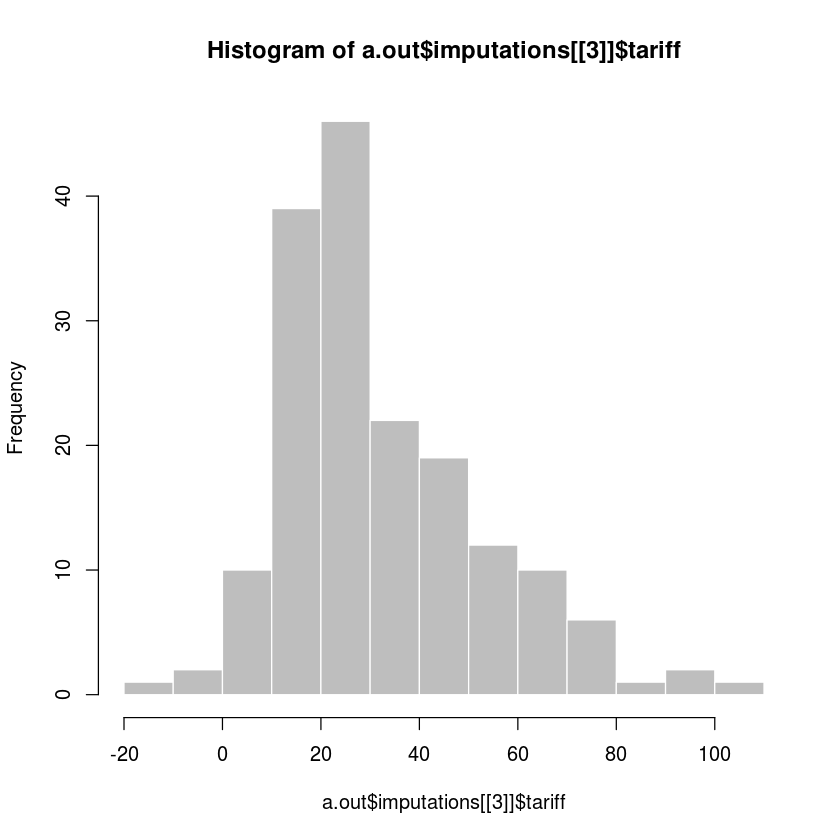

In [139]:
hist(a.out$imputations[[3]]$tariff, col="grey", border="white")

##### imputation 저장

In [141]:
save(a.out, file = "imputations.RData") #imputation 결과 저장

##### missmpa 그려서 결측값 체크하기

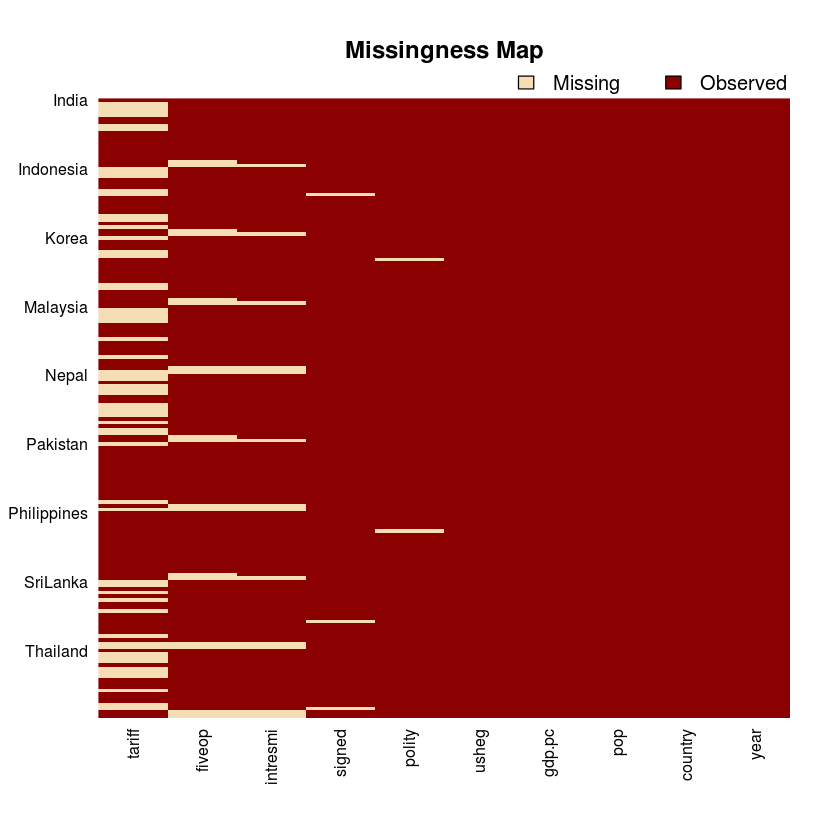

In [143]:
missmap(a.out)

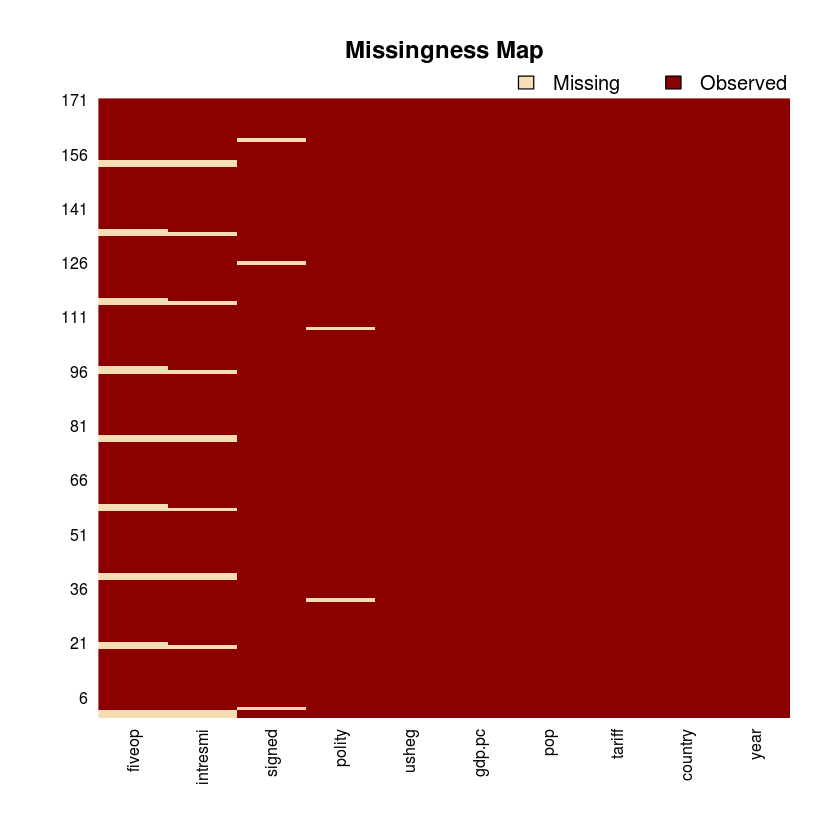

In [144]:
freetrade$tariff <- a.out$imputations[[5]]$tariff
missmap(freetrade)

In [145]:
?lofactor

### 19. 가설검정

- chisq.out.test()함수를 사용한다.

- s_ot$statistic - 검정통계량 = 사실인지 거짓인지 판단하는 기준 수치
- s_ot$p.value - p값
- s_ot$alternative - 양측, 단측검정

- 카이제곱 분포(chisquared distribution)를 바탕으로 검정하는 방법

-정규성 검정 (정규성 검정과 박스플롯을 사용하여 정규성 검정)
- 정규성을 따르는지 검정하는 정규분포이면, 정규분포를 따르면 99.3%의 데이터가 포함되게 되고, 이상치는 0.7%에 해당하는 데이터 임.

- 예시 : 정규성 검정결과 서울시의 식품민원 데이터의 처리시간은 Shapiro-Wilk normality test에 의하여 통계량 W는 0.12637이고, p-value값이 2.2e-16보다 적게 나와서 서울시의 식품민원 데이터의 처리시간은 정규분포라고 할 수 없다. 그러므로 박스플롯에서 사용된 이상치인 55개를 이상치로 설정 할 수 없다.

### 20. 이상치 1차원 및 2차원 도표

#### 1.outlier vector object의 1차원에서 도표화

In [155]:
set.seed(3147)
y <-rnorm(100)
is.vector(y)

[1] TRUE

In [156]:
b <- which(y %in% boxplot.stats(y)$out) # boxplot.stats 안에 $out 이란 변수가 있다. 
b

[1]  1 33 64 74

In [158]:
y[c(b)]  # 대량 -3 보다 작고, 2.5보다 큰 값이 이상치이다.
y[c(1,33,64,74)]

[1] -3.315391  2.685922 -3.055717  2.571203

[1] -3.315391  2.685922 -3.055717  2.571203

##### outlier인 값들만 저장, 인덱스번호와 값 형식으로 저장

In [159]:
ot <- cbind(b,y[c(1,33,64,74)])

##### plot 그려보기

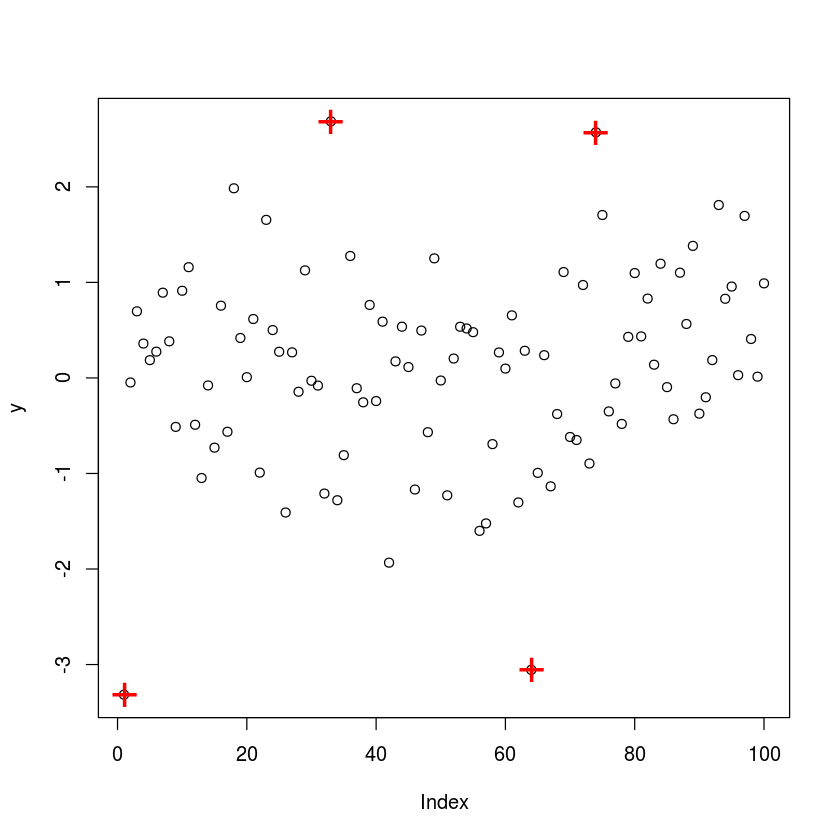

In [162]:
plot(y)
points(ot, col="red", pch="+", cex=2.5)

#### 2. outlier 도표화 2차원에서

In [186]:
y <- rnorm(100)
x <- rnorm(100)

In [187]:
df <- data.frame(x,y)

In [188]:
rm(x,y)

In [189]:
attach(df)

The following objects are masked from df (pos = 3):

    x, y

The following objects are masked from df (pos = 4):

    x, y

The following objects are masked from df (pos = 5):

    x, y



##### boxplot으로 outlier찾기

In [198]:
(a <- which(x %in% boxplot.stats(x)$out))   # x이 outlier는 62행과, 93행

[1] 62 93

In [191]:
(b <- which(y %in% boxplot.stats(y)$out))   # x이 outlier는 29행과, 45행, 62행

[1] 29 45 62

##### x,y 의 공통 outlier 찾기
- intersect()함수 이용

In [197]:
(outlier.list1 <- intersect(a,b))  # outliers in both x and y : 62행

[1] 62

##### boxplot 그려보기

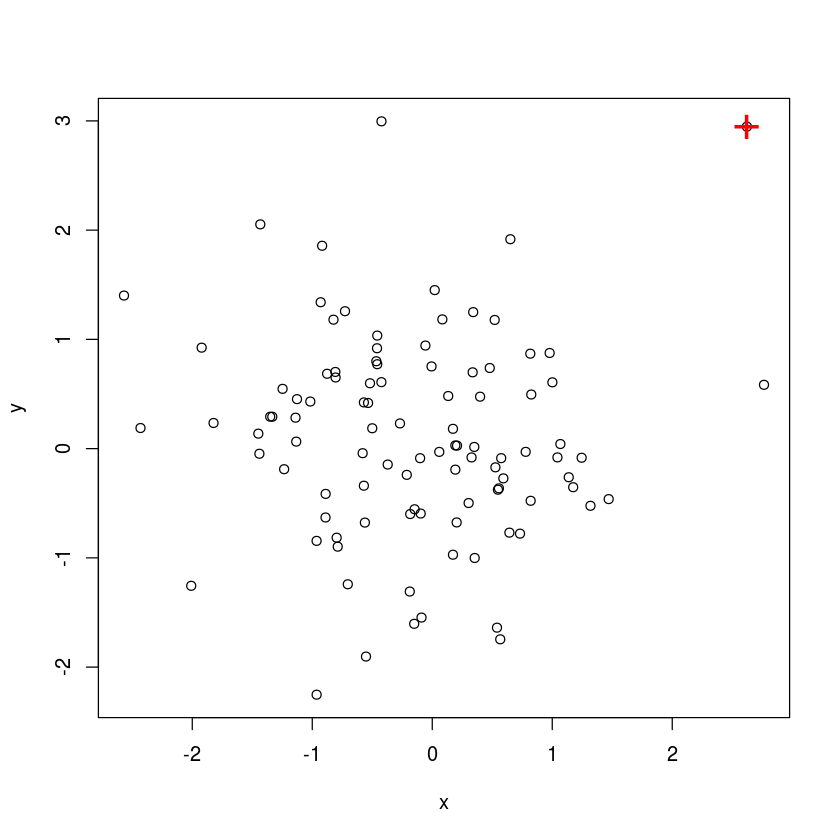

In [195]:
plot(df)
points(df[outlier.list1,], col="red", pch="+", cex= 2.5)

### 21. NA 집계하기 - 실전 연습!

#### 자료 읽기와 가공하기

In [1]:
library("openxlsx")

In [5]:
ham <- read.xlsx("data/outlier_food.xlsx", sheet=1, colNames = TRUE, detectDates = TRUE )

In [6]:
ham$sido <- substr(ham$sigun, 1, 2)
ham$sido <- factor(ham$sido) #그림을 잘 그리기 위해서 레벨을 부여. 범주화가 됨 -> 그래프 그리기 용이

ham$year <- substr(ham$접수일,1,4)

ham$mon <- substr(ham$접수일,6,7)
ham$mon<- factor(ham$mon)
ham$mon<- ordered(ham$mon, levels =c("01","02","03","04","05","06","07","08","09","10","11","12")) #월을 순서대로 나열하기 위해서

##### 텍스트 정규형

- [a-z]는 a부터 z중 하나
- "-" 기호와 함께 쓰면 문자의 범위를 지정할 수 있음.
- "[]" : "[" 과 "]" 사이의 문자열 중 하나를 의미.
- . \ | ( ) [ { ^ $ * ? # 이런 글자를 찾고 싶을 때는 앞에 \ \를 붙여준다
- "^"는 바로 뒤의 문자열을 기준으로 ","그 문자열과 동일한 문자열로 시작하는 것.
- 소문자 s는 줄바꿈을 임의의 한 문자로 취급하여 찾는다. 
- \n

In [17]:
ham$민원구분 <- gsub("[^\uAC00-\uD7A3xfe,0-9a-zA-Zㄱ-ㅎ ㅏ-ㅣ가-힣\\s]","",ham$민원구분)

In [18]:
ham$민원구분 <- factor(ham$민원구분)

In [21]:
levels(ham$민원구분)  #민원구분에 무슨 값이 있는지 추출!!!!

[1] "변경민원"       "변경민원      " "신규민원"       "신규민원      "
 [5] "재교부민원"     "재교부민원    " "지위승계민원"   "지위승계민원  "
 [9] "폐업민원"       "폐업민원      "

#### 시각화

In [23]:
library(ggplot2)

In [24]:
windows(30,30)

ERROR: Error in eval(expr, envir, enclos): could not find function "windows"


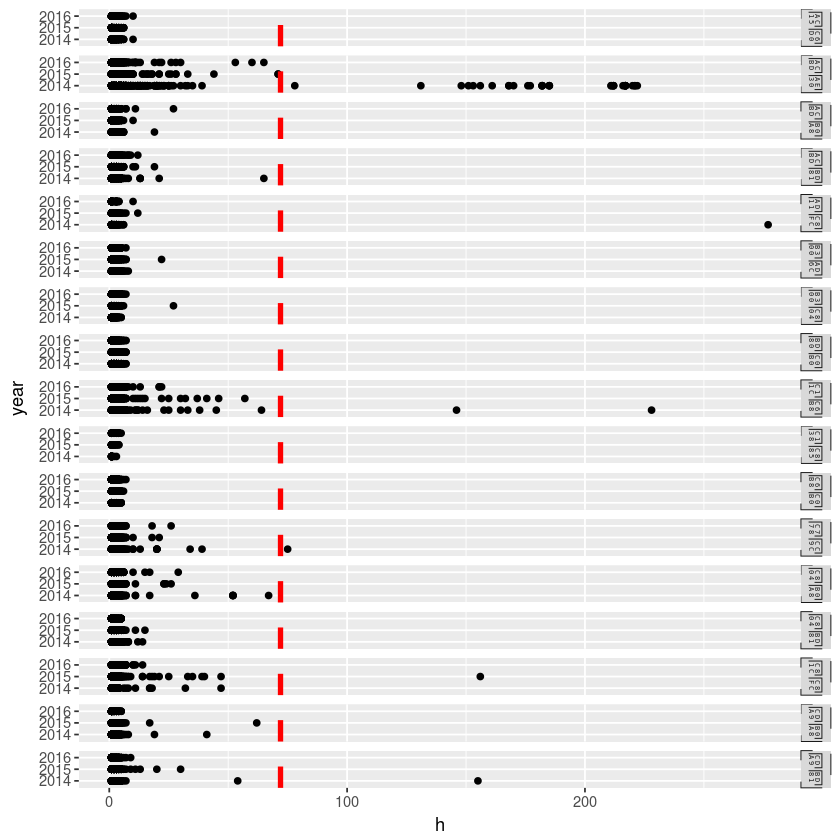

In [26]:
qplot(h, year, data=ham, facets=sido ~.)+
geom_vline(xintercept = 72, linetype="dashed", color = "red", size=1.5)

In [27]:
library(lattice)

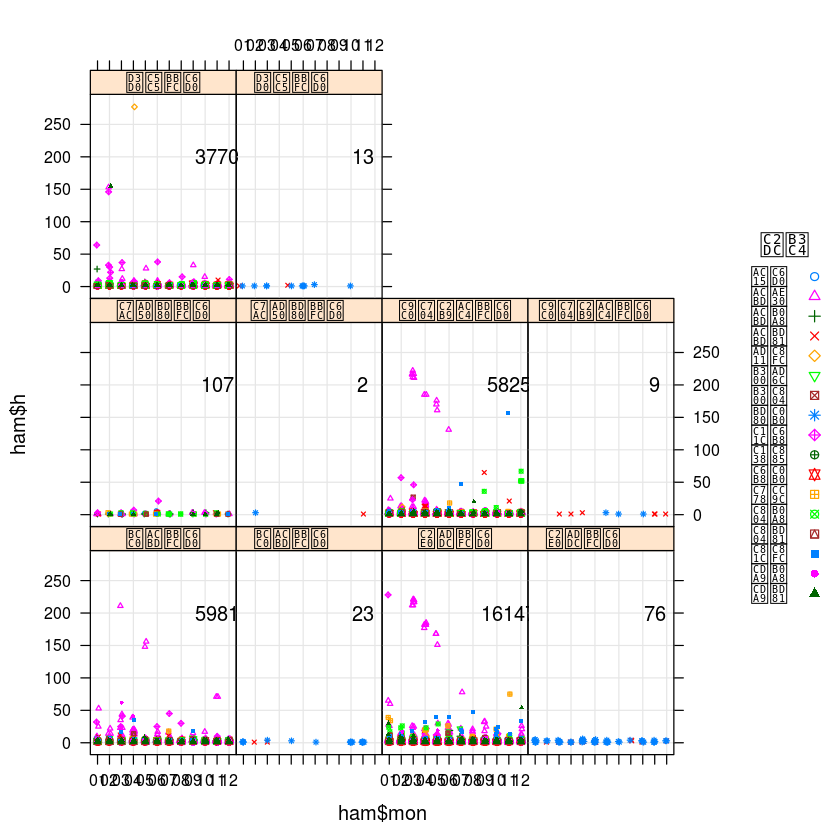

In [29]:
xyplot(ham$h~ham$mon | ham$민원구분, data=ham, nint=5, type="p", grid=TRUE, cex=0.4, jitter.x=TRUE,   
      group = sido, auto.key=list(title="시도",space = "right", cex=1.0),
      par.settings=list(superpose.symbol=list(pch=1:17)),
      panel=function(x,...){
          panel.xyplot(x=x,...)
          m<-length(x)
          panel.text(x=11, y=200,labels=m)
      }
      )